In [188]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

# Pauli X-Gate

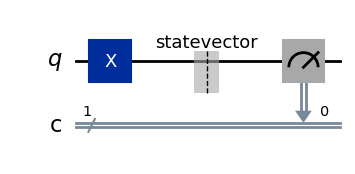

In [189]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.save_statevector()
qc.measure(0,0)
qc.draw('mpl')

In [190]:
backend = Aer.get_backend('aer_simulator')

#transpile and run
compiled = transpile(qc,backend)
result = backend.run(compiled,shots=1024).result()

#get classical counts
counts = result.get_counts()
print(counts)

{'1': 1024}


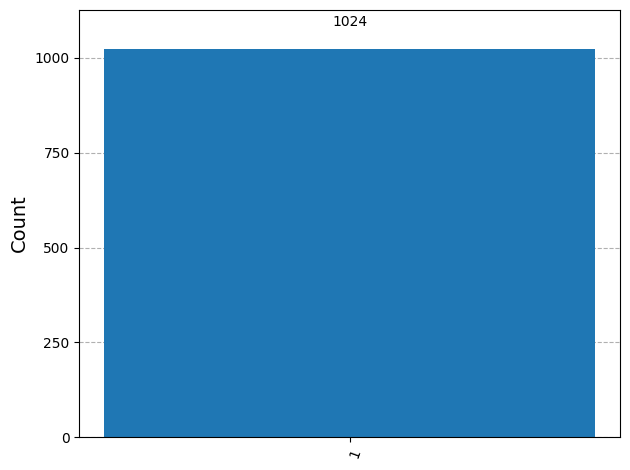

In [191]:
plot_histogram(counts)

In [192]:
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc).result()
print("Statevector:", result.get_statevector())


Statevector: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


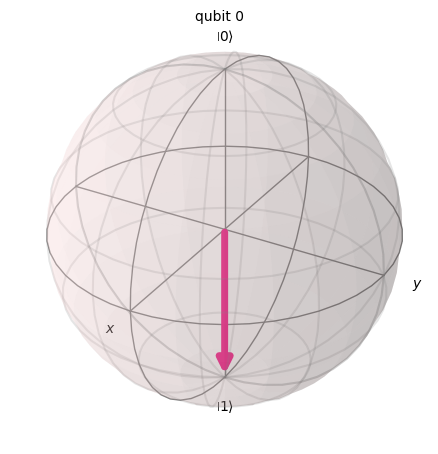

In [202]:
plot_bloch_multivector(result.get_statevector())

In [194]:
qc = QuantumCircuit(1)
qc.x(0)
print("X matrix:\n", Operator(qc).data)

X matrix:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


# Pauli Y-Gate

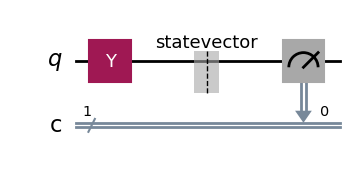

In [210]:
qc_y = QuantumCircuit(1,1)
qc_y.y(0)
qc_y.save_statevector()
qc_y.measure(0,0)
qc_y.draw('mpl')

In [211]:
backend = Aer.get_backend('aer_simulator')

#transpile and run
compiled_y = transpile(qc_y,backend)
result_y = backend.run(compiled_y,shots=1024).result()

#get classical counts
counts_y = result_y.get_counts()
print(counts_y)

{'1': 1024}


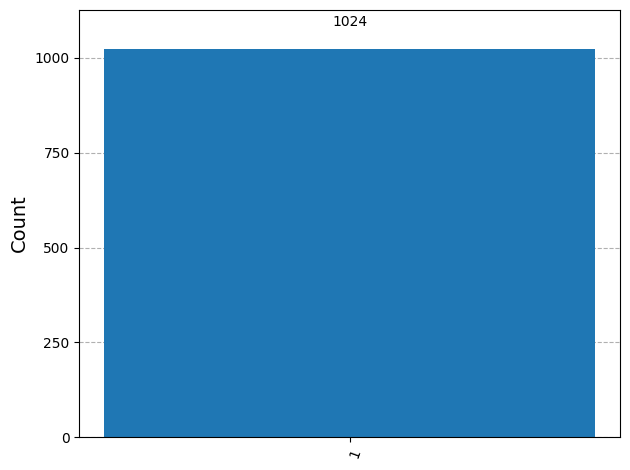

In [212]:
plot_histogram(counts_y)

In [ ]:
result_y = backend.run(qc_y).result()
print("Statevector:", result_y.get_statevector())

Statevector: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


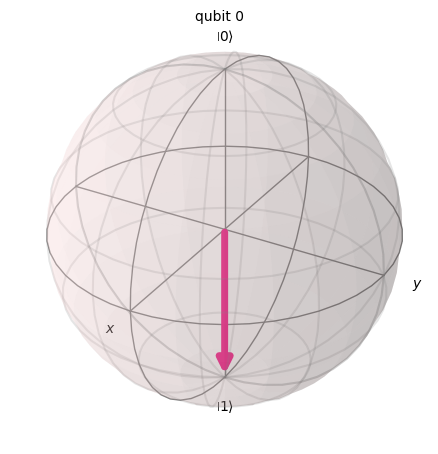

In [214]:
plot_bloch_multivector(result_y.get_statevector())

In [216]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
print("Y matrix:\n", Operator(qc_y).data)

Y matrix:
 [[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


# Pauli Z-Gate

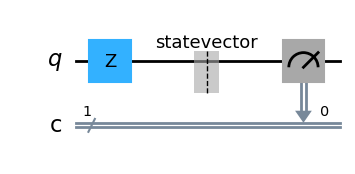

In [199]:
qc_z = QuantumCircuit(1,1)
qc_z.z(0)
qc_z.save_statevector()
qc_z.measure(0,0)
qc_z.draw('mpl')

In [200]:
#transpile and run
compiled_z = transpile(qc_z,backend)
result_z = backend.run(compiled_z,shots=1024).result()

#get classical counts
counts_z = result_z.get_counts()
print(counts_z)

{'0': 1024}


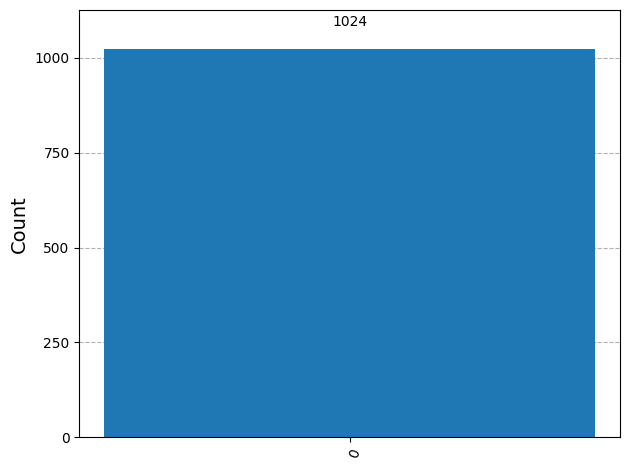

In [201]:
plot_histogram(counts_z)

In [217]:
result_z = backend.run(qc_z).result()
print("Statevector:", result_z.get_statevector())

Statevector: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


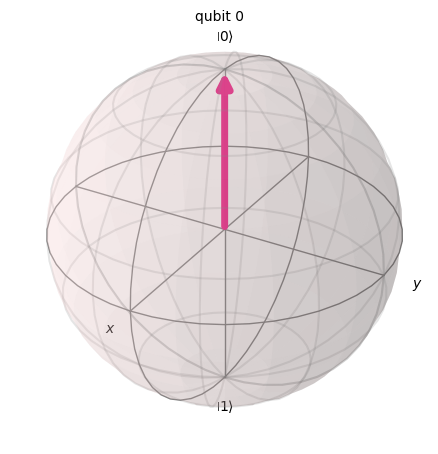

In [218]:
plot_bloch_multivector(result_z.get_statevector())

In [219]:
qc_z = QuantumCircuit(1)
qc_z.z(0)
print("Z matrix:\n", Operator(qc_z).data)

Z matrix:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
